In [1]:
#if using google Colab gpu
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

# Path to your dataset folder
folders = {
    'polarized': '偏振海面太阳耀斑',
    'visible': '可见光海面太阳耀斑',
    'infrared': '红外海面太阳耀斑'
}
main_folder  = "C:/Users/Administrator/Desktop/海面太阳耀斑图/海面太阳耀斑图"
# main_folder  = "/content/drive/MyDrive/海面太阳耀斑图" #google drive

print("Files in folder:", os.listdir(main_folder))


Files in folder: ['可见光海面太阳耀斑', '偏振海面太阳耀斑', '红外海面太阳耀斑']


In [3]:

def load_images_from_folder(folder, img_size=(256, 256)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif')):
            try:

                img = cv2.imread(img_path)
                if img is None:

                    img = Image.open(img_path).convert('RGB')
                    img = np.array(img)
                img = cv2.resize(img, img_size)
                img = img / 255.0
                images.append(img)
            except Exception as e:
                print(f"Warning: Could not read image {img_path} due to {str(e)}")
    return np.array(images)


def split_images_for_train_test(images, test_size=2):
    return images[test_size:], images[:test_size]


full_train_images = []
full_test_images = []


for folder_name in folders.values():
    folder_path = os.path.join(main_folder, folder_name)
    print(f"Processing folder: {folder_name}")
    images = load_images_from_folder(folder_path)
    train_images, test_images = split_images_for_train_test(images)
    full_train_images.extend(train_images)
    full_test_images.extend(test_images)


full_train_images = np.array(full_train_images)
full_test_images = np.array(full_test_images)

print(f"Total training images: {len(full_train_images)}")
print(f"Total testing images: {len(full_test_images)}")


Processing folder: 偏振海面太阳耀斑
Processing folder: 可见光海面太阳耀斑
Processing folder: 红外海面太阳耀斑
Total training images: 77
Total testing images: 6


In [4]:
!pip install tensorflow

In [5]:
import tensorflow
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)


    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    u4 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model


In [7]:

model = unet_model()
model.compile(optimizer='adam', loss='mse')


In [8]:
# Train the model
history = model.fit(full_train_images, full_train_images, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - loss: 0.0920 - val_loss: 0.1148
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.0291 - val_loss: 0.0441
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0179 - val_loss: 0.0248
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.0103 - val_loss: 0.0147
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - loss: 0.0060 - val_loss: 0.0034
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - loss: 0.0018 - val_loss

In [9]:
model.save("glare_suppression_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Original Image Contrast: 67.76035286458767
Processed Image Contrast: 66.02578182518563
Original Image StdDev: 67.73130300601889
Processed Image StdDev: 66.02327982969238
PSNR between original and processed: 31.595587551632285


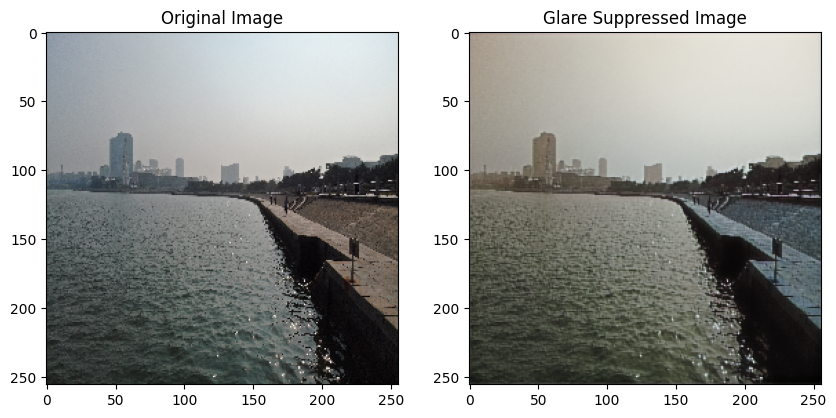

In [14]:
from skimage.metrics import peak_signal_noise_ratio as psnr

# Function to calculate contrast (RMS contrast)
def calculate_contrast(image):
    # Convert to grayscale if necessary
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray_image = image
    return np.std(gray_image)

# Function to calculate standard deviation of pixel intensities
def calculate_standard_deviation(image):
    return np.std(image)

# Function to calculate PSNR
def calculate_psnr(original_image, processed_image):
    # Ensure the images are uint8 for PSNR calculation
    original_image_uint8 = (original_image * 255).astype(np.uint8)
    processed_image_uint8 = (processed_image * 255).astype(np.uint8)
    return psnr(original_image_uint8, processed_image_uint8)

# Modify the predict_and_show function to include evaluation
def predict_and_evaluate(image, model):
    # Ensure image is in uint8 format for OpenCV functions
    image_uint8 = (image * 255).astype(np.uint8)  # Convert back to [0, 255] and uint8
    img_resized = cv2.resize(image_uint8, (256, 256)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)

    # Predict glare-suppressed image
    output = model.predict(img_resized)

    # Convert predicted output back to uint8 for display and evaluation
    output_uint8 = (output[0] * 255).astype(np.uint8)

    # Evaluate the original and processed images
    contrast_original = calculate_contrast(image_uint8)
    contrast_processed = calculate_contrast(output_uint8)
    stddev_original = calculate_standard_deviation(image_uint8)
    stddev_processed = calculate_standard_deviation(output_uint8)
    psnr_value = calculate_psnr(image_uint8, output_uint8)

    print(f"Original Image Contrast: {contrast_original}")
    print(f"Processed Image Contrast: {contrast_processed}")
    print(f"Original Image StdDev: {stddev_original}")
    print(f"Processed Image StdDev: {stddev_processed}")
    print(f"PSNR between original and processed: {psnr_value}")

    # Show the original and output images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image_uint8, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Glare Suppressed Image")
    plt.imshow(output_uint8)
    plt.show()

# Test the model on an example image and evaluate
test_image = full_test_images[2]  # Pick one test image
predict_and_evaluate(test_image, model)


In [13]:
"""
from tensorflow.keras.models import load_model

# Load the saved model
saved_model = load_model("glare_suppression_model.h5")

# Use the loaded model for predictions
predict_and_show(test_image, saved_model)
"""

'\nfrom tensorflow.keras.models import load_model\n\n# Load the saved model\nsaved_model = load_model("glare_suppression_model.h5")\n\n# Use the loaded model for predictions\npredict_and_show(test_image, saved_model)\n'